In [ ]:
# Gabe text data -> Yes/No dataframes

from docx import Document
import pandas as pd
import os

def extract_responses(docx_path, response_type="Claim"):
    document = Document(docx_path)
    responses = []

    start_extraction = False

    for paragraph in document.paragraphs:
        text = paragraph.text.strip()

        if response_type == "Claim" and text.startswith("Claim: "):
            start_extraction = True
            accumulated_text = ""
            continue
        elif response_type == "Evidence" and text.startswith("Evidence"):
            start_extraction = True
            accumulated_text = ""
            continue
        elif response_type == "Reasoning" and text.startswith("Reasoning"):
            start_extraction = True
            accumulated_text = ""
            continue

        if start_extraction:
            if (response_type == "Claim" and text.startswith("Evidence")) or \
               (response_type == "Evidence" and text.startswith("Reasoning")) or \
               (response_type == "Reasoning" and text.startswith("Copy")):
                break
            accumulated_text += text + " "

    return accumulated_text.strip()


dfs_list = []

folder_path = os.path.join(os.path.expanduser("~"), "Downloads", "studentresponsesgabe")

for filename in os.listdir(folder_path):
    if filename.endswith(".docx"):
        file_path = os.path.join(folder_path, filename)

        claim = extract_responses(file_path, response_type="Claim")
        evidence = extract_responses(file_path, response_type="Evidence")
        reasoning = extract_responses(file_path, response_type="Reasoning")

        if not claim.startswith("Evidence") and claim and reasoning:
            df = pd.DataFrame({'Claim': [claim], 'Evidence': [evidence], 'Reasoning': [reasoning], 'Filename': [filename]})
            dfs_list.append(df)

big_df = pd.concat(dfs_list, ignore_index=True)

import pandas as pd

big_df['Claim_lower'] = big_df['Claim'].str.lower()
big_df['Reasoning_lower'] = big_df['Reasoning'].str.lower()

no_df = big_df[big_df['Claim_lower'].str.contains(r'\b(?:didn\'t|not|no)\b')]

yes_df = big_df[~big_df.index.isin(no_df.index)]

In [ ]:
import sentence_transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import pickle

# Save model
with open('all-MiniLM-L6-v2.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle
import sentence_transformers

# Load model
with open('all-MiniLM-L6-v2.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
from sentence_transformers import SentenceTransformer, util

# BERT similarity scores for yes df Gabe
example_response = "Evolution requires inheritance, variation, and differential survival and reproduction. The guppies had variation in the form of different color levels, with there being dark, medium, and light guppies. They also showed inheritance, because the offspring of the guppies all inherited their parents color. Their differential reproduction was due to the lighter guppies being more likely to reproduce. Therefore, the guppy population showed evolution by natural selection."
example_response = example_response.lower()
embedding1 = model.encode(example_response, convert_to_tensor=True)

for index, text_entry in yes_df['Reasoning_lower'].items():
    embedding2 = model.encode(str(text_entry), convert_to_tensor=True)
    cosine_similarity = util.cos_sim(embedding1, embedding2)
    yes_df.at[index,'BERT_Score'] = cosine_similarity.item()

In [ ]:
# BERT similarity scores for no df Gabe
example_response = "Evolution requires inheritance, variation, and differential survival and reproduction. The guppies had variation in the form of different color levels, with there being dark, medium, and light guppies. They also showed inheritance, because the offspring of the guppies all inherited their parent’s color. However, there was no differential survival present in the model. Therefore, the guppy population did not show evolution by natural selection."
example_response = example_response.lower()
embedding1 = model.encode(example_response, convert_to_tensor=True)

for index, text_entry in no_df['Reasoning_lower'].items():
    embedding2 = model.encode(str(text_entry), convert_to_tensor=True)
    cosine_similarity = util.cos_sim(embedding1, embedding2)
    no_df.at[index,'BERT_Score'] = cosine_similarity.item()

In [ ]:
yes_df_Gabe = yes_df
no_df_Gabe = no_df

In [ ]:
# Kristy text data -> Yes/No dataframes

def extract_responses(docx_path, response_type="Claim"):
    document = Document(docx_path)
    responses = []

    start_extraction = False

    for paragraph in document.paragraphs:
        text = paragraph.text.strip()

        if response_type == "Claim" and text.startswith("Claim: "):
            start_extraction = True
            accumulated_text = ""
            continue
        elif response_type == "Evidence" and text.startswith("Evidence"):
            start_extraction = True
            accumulated_text = ""
            continue
        elif response_type == "Reasoning" and text.startswith("Reasoning"):
            start_extraction = True
            accumulated_text = ""
            continue

        if start_extraction:
            if (response_type == "Claim" and text.startswith("Evidence")) or \
               (response_type == "Evidence" and text.startswith("Reasoning")) or \
               (response_type == "Reasoning" and text.startswith("Copy")):
                break
            accumulated_text += text + " "

    return accumulated_text.strip()


dfs_list = []

folder_path = os.path.join(os.path.expanduser("~"), "Downloads", "studentresponseskristy")

for filename in os.listdir(folder_path):
    if filename.endswith(".docx"):
        file_path = os.path.join(folder_path, filename)

        claim = extract_responses(file_path, response_type="Claim")
        evidence = extract_responses(file_path, response_type="Evidence")
        reasoning = extract_responses(file_path, response_type="Reasoning")

        if not claim.startswith("Evidence") and claim and reasoning:
            df = pd.DataFrame({'Claim': [claim], 'Evidence': [evidence], 'Reasoning': [reasoning], 'Filename': [filename]})
            dfs_list.append(df)

big_df = pd.concat(dfs_list, ignore_index=True)

import pandas as pd

big_df['Claim_lower'] = big_df['Claim'].str.lower()
big_df['Reasoning_lower'] = big_df['Reasoning'].str.lower()

no_df = big_df[big_df['Claim_lower'].str.contains(r'\b(?:didn\'t|not|no)\b')]

yes_df = big_df[~big_df.index.isin(no_df.index)]

In [ ]:
# BERT similarity scores for yes df Kristy
example_response = "Evolution requires inheritance, variation, and differential survival and reproduction. The guppies had variation in the form of different color levels, with there being dark, medium, and light guppies. They also showed inheritance, because the offspring of the guppies all inherited their parents color. Their differential reproduction was due to the lighter guppies being more likely to reproduce. Therefore, the guppy population showed evolution by natural selection."
example_response = example_response.lower()
embedding1 = model.encode(example_response, convert_to_tensor=True)

for index, text_entry in yes_df['Reasoning_lower'].items():
    embedding2 = model.encode(str(text_entry), convert_to_tensor=True)
    cosine_similarity = util.cos_sim(embedding1, embedding2)
    yes_df.at[index,'BERT_Score'] = cosine_similarity.item()

In [ ]:
# BERT similarity scores for no df Kristy
example_response = "Evolution requires inheritance, variation, and differential survival and reproduction. The guppies had variation in the form of different color levels, with there being dark, medium, and light guppies. They also showed inheritance, because the offspring of the guppies all inherited their parent’s color. However, there was no differential survival present in the model. Therefore, the guppy population did not show evolution by natural selection."
example_response = example_response.lower()
embedding1 = model.encode(example_response, convert_to_tensor=True)

for index, text_entry in no_df['Reasoning_lower'].items():
    embedding2 = model.encode(str(text_entry), convert_to_tensor=True)
    cosine_similarity = util.cos_sim(embedding1, embedding2)
    no_df.at[index,'BERT_Score'] = cosine_similarity.item()

In [ ]:
yes_df_Kristy = yes_df
no_df_Kristy = no_df

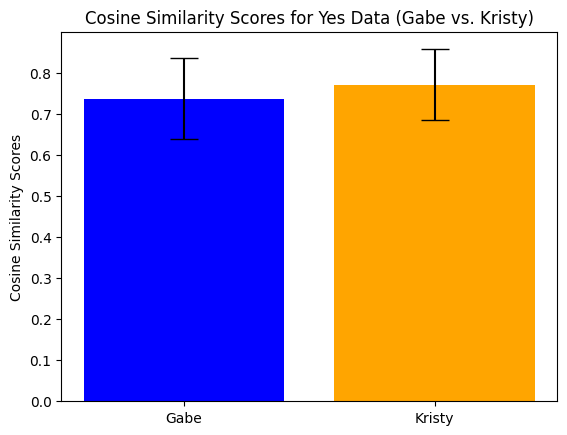

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Gabe', 'Kristy']
values = [yes_df_Gabe['BERT_Score'].mean(), yes_df_Kristy['BERT_Score'].mean()]
std_devs = [yes_df_Gabe['BERT_Score'].std(), yes_df_Kristy['BERT_Score'].std()]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, yerr=std_devs, capsize=10, color=['blue', 'orange'])

ax.set_ylabel('Cosine Similarity Scores')
ax.set_title('Cosine Similarity Scores for Yes Data (Gabe vs. Kristy)')

plt.show()

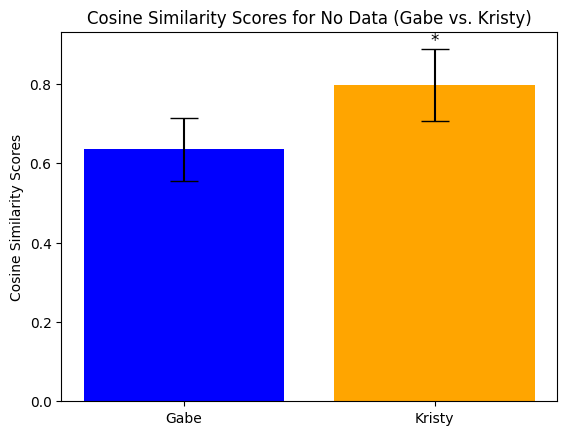

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Gabe', 'Kristy']
values = [no_df_Gabe['BERT_Score'].mean(), no_df_Kristy['BERT_Score'].mean()]
std_devs = [no_df_Gabe['BERT_Score'].std(), no_df_Kristy['BERT_Score'].std()]

fig, ax = plt.subplots()
bars = ax.bar(labels, values, yerr=std_devs, capsize=10, color=['blue', 'orange'])

ax.set_ylabel('Cosine Similarity Scores')
ax.set_title('Cosine Similarity Scores for No Data (Gabe vs. Kristy)')

ax.text(bars[1].get_x() + bars[1].get_width() / 2, max(values) + 0.09, '*', ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
yes_df_Gabe.to_csv('gabe_yes_df.csv', index=False)
no_df_Gabe.to_csv('gabe_no_df.csv', index=False)
yes_df_Kristy.to_csv('kristy_yes_df.csv', index=False)
no_df_Kristy.to_csv('kristy_no_df.csv', index=False)

In [ ]:
example_response = "Evolution requires inheritance, variation, and differential survival and reproduction. The guppies had variation in the form of different color levels, with there being dark, medium, and light guppies. They also showed inheritance, because the offspring of the guppies all inherited their parent’s color. Their differential reproduction was due to the lighter guppies being more likely to reproduce. Therefore, the guppy population showed evolution by natural selection."
example_response = example_response.lower()
embedding1 = model.encode(example_response, convert_to_tensor=True)

test1 = "Variation, inheritance, and differential survival and reproduction."
test2 = "Variation is black, inheritance is red, and differential survival and reproduction is pink."

embedding2 = model.encode(test1, convert_to_tensor=True)
cosine_similarity = util.cos_sim(embedding1, embedding2)
print(cosine_similarity)
embedding2 = model.encode(test2, convert_to_tensor=True)
cosine_similarity = util.cos_sim(embedding1, embedding2)
print(cosine_similarity)

tensor([[0.4816]])
tensor([[0.5092]])


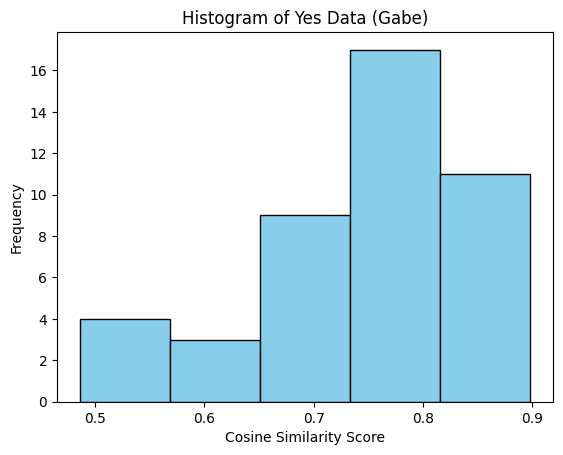

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(yes_df_Gabe['BERT_Score'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Yes Data (Gabe)')

plt.show()

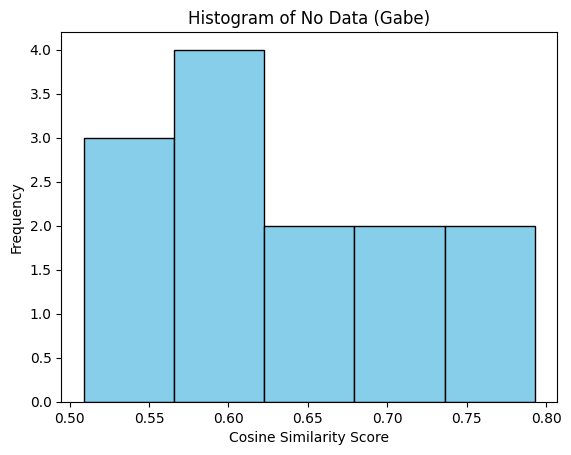

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(no_df_Gabe['BERT_Score'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of No Data (Gabe)')

plt.show()

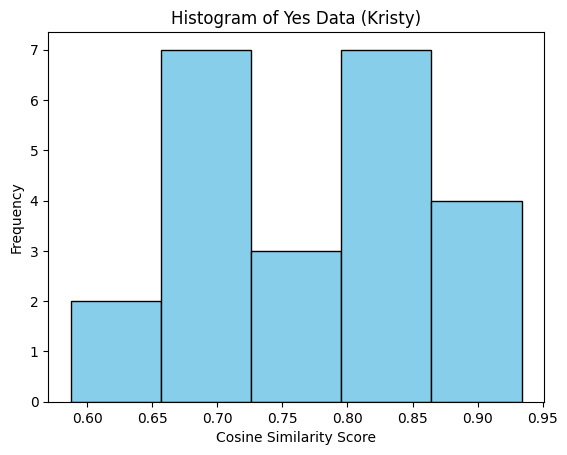

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(yes_df_Kristy['BERT_Score'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Yes Data (Kristy)')

plt.show()

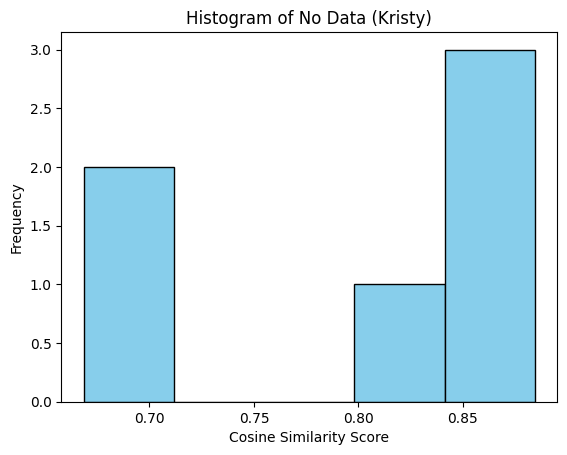

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(no_df_Kristy['BERT_Score'], bins=5, color='skyblue', edgecolor='black')

plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of No Data (Kristy)')

plt.show()